## Methods for Explainable AI
### Demonstration

In [3]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.inspection import PartialDependenceDisplay

import matplotlib.pyplot as plt


import numpy as np



## Loading the Dataset

In [4]:
data = pd.read_csv('./melb_data.csv')
print(data.head(20))


FileNotFoundError: [Errno 2] No such file or directory: './melb_data.csv'

## Imputation, Normalization and Training

MSE: 227722031362.76


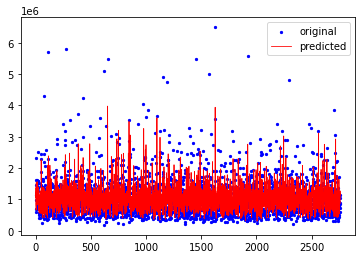

In [ ]:
cols_to_use = ['Distance', 'Landsize', 'BuildingArea']
# cols_to_use = ['Distance', 'Landsize', 'BuildingArea',  'Rooms', 'Longtitude', 'Lattitude']

target = data.Price
x = data[cols_to_use]


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X = imputer.fit_transform(x)



xtrain, xtest, ytrain, ytest=train_test_split(imputed_X, y, random_state=12, 
             test_size=0.15)


my_model = GradientBoostingRegressor()
my_model.fit(xtrain, ytrain)

y_pred = my_model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)

print("MSE: %.2f" % mse)


x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()



## PDP's

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


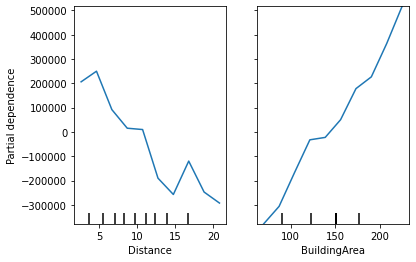

In [ ]:
# left one explanation:
# Distance in this dataset measures the distance to Melbourne's central business district.

# You'll see some negative numbers. 
# That doesn't mean the price would sell for a negative price. 
# Instead it means the prices would have been less than the actual average price for that distance.
# Nice suburb at kilometer 16

# The right graph shows the impact of building area, which is interpreted similarly. A larger building area means higher prices.


my_plots = plot_partial_dependence(my_model, 
                                   features=[0,2], 
                                   X=xtrain, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

## Individual Conditional Expectation

In [5]:
display = PartialDependenceDisplay.from_estimator(
    my_model,
    xtrain,
    features=[0,2],
    feature_names=cols_to_use, 
    kind="both",
)
display.figure_.suptitle(
    "Dataset"
)
display.figure_.subplots_adjust(hspace=0.3)

NameError: name 'my_model' is not defined